In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [21]:
path = '/Users/desislavamarvakov/Study/HIT/שנה ב׳/סמסטר ב׳/Data Science/Final Project/Code/clean_outcome.csv'
df = pd.read_csv(path)
df.head()
df.drop(columns=['Unnamed: 0'], inplace = True)

In [22]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125860 entries, 0 to 125891
Data columns (total 12 columns):
Animal ID                 125860 non-null object
Name                      125860 non-null int64
DateTime                  125860 non-null object
Outcome Type              125860 non-null object
Animal Type               125860 non-null object
Sex upon Outcome          125860 non-null object
Age_upon_Outcome_years    125860 non-null float64
Breed                     125860 non-null object
Color                     125860 non-null object
DayOfWeek                 125860 non-null int64
Month                     125860 non-null int64
year                      125860 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 12.5+ MB


In [23]:
df = df[df['Animal Type'] != 'Livestock']
df = df[df['Animal Type'] != 'Bird']
df = df[df['Animal Type'] != 'Other']

In [24]:
## Use LabelEncoder to convert rest of features
labelencoder = LabelEncoder()

# enc_list = ['Outcome Type','Animal Type','Sex upon Outcome', 'Color']
# encoded = df[enc_list].apply(LabelEncoder().fit_transform)
df['Outcome Type'] = labelencoder.fit_transform(df['Outcome Type'])
df['Animal Type'] = labelencoder.fit_transform(df['Animal Type'])
df['Sex upon Outcome'] = labelencoder.fit_transform(df['Sex upon Outcome'])
df['Color'] = labelencoder.fit_transform(df['Color'])
df['Breed'] = labelencoder.fit_transform(df['Breed'])
df

,Animal ID,Name,DateTime,Outcome Type,Animal Type,Sex upon Outcome,Age_upon_Outcome_years,Breed,Color,DayOfWeek,Month,year
0,A794011,1,2019-05-08 18:20:00,7,0,2,2.000000,0,0,2,5,2019
1,A776359,1,2018-07-18 16:02:00,0,1,2,1.000000,0,0,2,7,2018
3,A720371,1,2016-02-13 17:59:00,0,1,2,0.333333,0,1,5,2,2016
4,A674754,0,2014-03-18 11:47:00,8,0,1,0.016438,0,1,1,3,2014
5,A659412,1,2020-10-05 14:37:00,0,1,3,7.000000,0,1,0,10,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
125887,A832672,1,2021-05-02 15:35:00,8,1,3,5.000000,0,1,6,5,2021
125888,A830970,1,2021-05-02 15:11:00,0,1,2,14.000000,1,1,6,5,2021
125889,A832671,1,2021-05-02 15:35:00,8,1,3,8.000000,1,1,6,5,2021
125890,A832788,1,2021-05-02 15:56:00,0,1,2,2.000000,0,0,6,5,2021


In [25]:
df_ID = df['Animal ID']
df.drop(["Animal ID", "DateTime"],axis=1, inplace = True)

In [26]:
#predicting outcome type out of ['Rto-Adopt','Adoption','Euthanasia','Transfer', 'Return to Owner',
#'Died','Disposal','Missing','Relocate']
#based on ['animal type', 'color', 'breed','age uppon outcome']
TRAINING_FEATURES = df[df.columns.difference(['Outcome Type'])]

TARGET_FEATURE    = 'Outcome Type'

X = TRAINING_FEATURES
y = df[TARGET_FEATURE]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("\nTarget distribution in original dataset:\n{}".format(y.value_counts()))
print("\nTarget distribution in the training set:\n{}\n".format(y_train.value_counts()))
print("Target distribution in the test set:\n{}".format(y_test.value_counts()))

Initial amount of samples: #118486
Number of training samples: #94788
Number of test samples: #23698

Target distribution in original dataset:
0    55201
8    36054
6    21610
3     3770
1      953
7      716
2      115
4       65
5        2
Name: Outcome Type, dtype: int64

Target distribution in the training set:
0    44140
8    28778
6    17369
3     3055
1      748
7      556
2       85
4       55
5        2
Name: Outcome Type, dtype: int64

Target distribution in the test set:
0    11061
8     7276
6     4241
3      715
1      205
7      160
2       30
4       10
Name: Outcome Type, dtype: int64


In [28]:
print("Records & variables in X_train dataset: ", X_train.shape)
print("Records in training dataset for Target variable: ", y_train.shape)
print("Records & variables in X_test dataset: ", X_test.shape)
print("Records in testing dataset for Target variable: ", y_test.shape)

Records & variables in X_train dataset:  (94788, 9)
Records in training dataset for Target variable:  (94788,)
Records & variables in X_test dataset:  (23698, 9)
Records in testing dataset for Target variable:  (23698,)


In [29]:
X_train

,Age_upon_Outcome_years,Animal Type,Breed,Color,DayOfWeek,Month,Name,Sex upon Outcome,year
94586,5.000000,1,0,1,1,3,1,3,2014
58826,3.000000,0,0,1,6,9,1,3,2014
96814,2.000000,1,0,0,1,2,1,3,2018
35585,2.000000,0,0,1,2,6,0,0,2017
28752,0.416667,1,0,1,5,12,0,0,2018
...,...,...,...,...,...,...,...,...,...
81580,0.166667,1,0,0,1,6,1,2,2017
117068,0.416667,0,0,0,0,2,0,2,2016
110086,1.000000,0,0,0,4,3,1,1,2016
912,11.000000,0,0,1,1,7,1,2,2018


In [30]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Do random forest
rf = RandomForestClassifier(bootstrap= True, n_estimators=300, random_state=0)
trained_forest = rf.fit(X_train, y_train)
# Train accuracy
tra_score=rf.score(X, y)

print("Training accuracy for RandomForest: ",tra_score)

Training accuracy for RandomForest:  0.8556453927046234
CPU times: user 1min 25s, sys: 1.43 s, total: 1min 27s
Wall time: 27.3 s


In [31]:
%%time
y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.9021078617546525
Accuracy on test data=  0.6698033589332433
CPU times: user 56.9 s, sys: 359 ms, total: 57.2 s
Wall time: 8.15 s


In [32]:
df

,Name,Outcome Type,Animal Type,Sex upon Outcome,Age_upon_Outcome_years,Breed,Color,DayOfWeek,Month,year
0,1,7,0,2,2.000000,0,0,2,5,2019
1,1,0,1,2,1.000000,0,0,2,7,2018
3,1,0,1,2,0.333333,0,1,5,2,2016
4,0,8,0,1,0.016438,0,1,1,3,2014
5,1,0,1,3,7.000000,0,1,0,10,2020
...,...,...,...,...,...,...,...,...,...,...
125887,1,8,1,3,5.000000,0,1,6,5,2021
125888,1,0,1,2,14.000000,1,1,6,5,2021
125889,1,8,1,3,8.000000,1,1,6,5,2021
125890,1,0,1,2,2.000000,0,0,6,5,2021


In [33]:
all_features = ['Age_upon_Outcome_Days', 'Animal Type', 'Breed', 'Color', 'DayOfWeek', 'Month', 'Sex upon Outcome', 'year', 'Name']
featuresDF=pd.DataFrame({"features":all_features,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
0,Age_upon_Outcome_Days,0.257133
7,year,0.200930
5,Month,0.189075
4,DayOfWeek,0.115437
8,Name,0.106487
6,Sex upon Outcome,0.054736
1,Animal Type,0.033746
3,Color,0.025332
2,Breed,0.017124


In [34]:
##reverse the label encoder
# df['Outcome Type'] = labelencoder.inverse_transform(df['Outcome Type'])
# df.head()


In [35]:
#different values of estimators
#n_estimators = number of trees in the foreset

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'n_estimators':range(50,551,1000) }
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train, y_train)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


best parameter set is: {'n_estimators': 50}  and its score was 0.6579208338608262


In [36]:
##reverse the label encoder
# df['Outcome Type'] = labelencoder.inverse_transform(df['Outcome Type'])
# df['Color'] = labelencoder.inverse_transform(df['Color'])
# df['Animal Type'] = labelencoder.inverse_transform(df['Animal Type'])
# df['Sex upon Outcome'] = labelencoder.inverse_transform(df['Sex upon Outcome'])

# df.head()

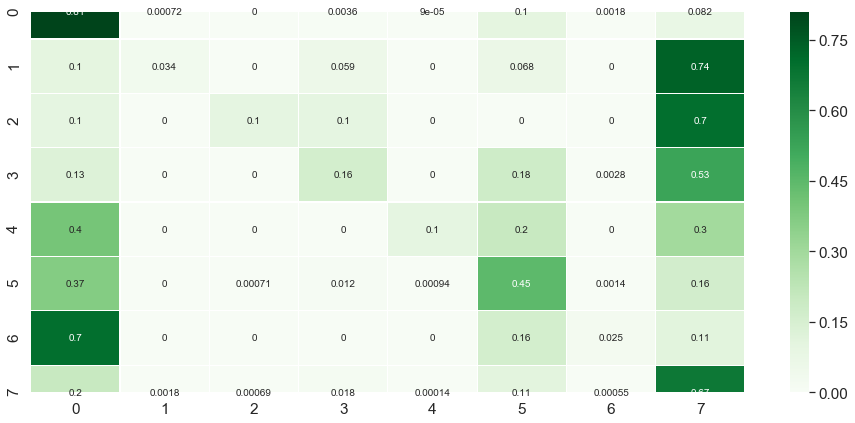

In [37]:
## View confusion matrix for test data and predictions
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [39]:

clf_model = LR_model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [40]:
#DataFrame that contains the predicted probability for each animal outcome type (for the logistic Regression)
y_pred_val = clf_model.predict(X_test)
y_pred_val_prob = LR_model.predict_proba(X_test)
mydataframe = pd.DataFrame(y_pred_val_prob)
mydataframe.columns =  ['Rto-Adopt','Adoption','Euthanasia','Transfer', 'Return to Owner','Died','Disposal','Missing','Relocate']


In [41]:
mydataframe.insert(0, 'Animal ID', df_ID)
#mydataframe['Animal ID'] = df_ID
mydataframe

,Animal ID,Rto-Adopt,Adoption,Euthanasia,Transfer,Return to Owner,Died,Disposal,Missing,Relocate
0,A794011,0.717484,0.010803,0.006855,0.017419,0.000080,1.358548e-04,0.003963,0.001194,0.242067
1,A776359,0.603053,0.007908,0.001023,0.029336,0.000117,2.123941e-05,0.004353,0.000658,0.353530
2,NaN,0.451168,0.009254,0.000118,0.016401,0.001617,1.522565e-05,0.073482,0.002823,0.445122
3,A720371,0.155685,0.013766,0.007259,0.042698,0.000283,2.614684e-06,0.070406,0.001203,0.708696
4,A674754,0.678699,0.002122,0.000037,0.007563,0.000528,7.643615e-06,0.193842,0.005757,0.111443
...,...,...,...,...,...,...,...,...,...,...
23693,A787901,0.664676,0.001617,0.000055,0.010752,0.000222,2.222446e-06,0.230355,0.009199,0.083122
23694,A787390,0.531220,0.002111,0.000052,0.011557,0.000519,9.918036e-07,0.250178,0.007334,0.197028
23695,A810015,0.499148,0.002423,0.000118,0.009950,0.000411,1.678035e-06,0.251206,0.006275,0.230468
23696,A756957,0.442949,0.015840,0.000322,0.044169,0.000465,1.215189e-05,0.006877,0.000377,0.488988


In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

Accuracy: 0.6698033589332433
Precision: 0.6534780907557826
Recall: 0.6698033589332433
